In [29]:
import numpy as np
import matplotlib.pyplot as plt
from modules.approximations import *
import matplotlib.font5 fdfghbvcltrt_manager

In [30]:
#Graph Parameters
plt.rcParams['figure.figsize'] = 12,8
plt.rc('text', usetex=False)
plt.rcParams.update({'font.size': 15,
                     'legend.fontsize': 15})
plt.rcParams['font.family'] = 'serif'
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['lines.linewidth'] = 1.5

In [31]:
# Parameters
R = 3
dtheta = 0.01
dphi = 0.01

# Initializing arrays/lists
thetaRange = np.arange(0, 2*np.pi, dtheta)
phiRange = np.arange(0, 2*np.pi, dphi)
phaseRange = np.arange(0, 2*np.pi, 0.1)
F = []

In [32]:
# Psi - between radial vector and line of sight vector at different locations on the surface
#i - obsNspin
def psi(theta, phi, c, phase): 
    
    i = c[1]
    w = phase
        
    n_psi_hat = (np.sin(i)*np.sin(w), np.sin(i)*np.cos(w), np.cos(i))                               #Unit vector towards lOS 
    r_hat = (np.sin(phi)*np.cos(theta), np.sin(phi)*np.sin(theta), np.cos(phi)) #Unit vector to a position on surface 
    
    return np.arccos(np.dot(n_psi_hat, r_hat)) #Angle between n_psi_hat and r_hat

In [114]:
# Normalized Intensity (Polar hotspots spanning 20 degrees of constant intensity)
def I(theta, phi, c):
    
    eta_p = c[0]
    theta_p = np.pi/2
    r = 0.1 #radius in radians
    
    # Primary Pole
    if (np.abs(phi-eta_p)<= r and np.abs(theta-theta_p)<= r):
        return 5
    
    #Secondary Pole
    elif (np.abs(phi-(eta_p + np.pi))<= r and np.abs(theta-(theta_p))<= r):
        return 3
    elif (np.abs(phi-(eta_p))<= r and np.abs(theta-(theta_p+np.pi))<= r):
        return 3
    
    else:
        return 0.1

In [115]:
# Flux per unit area (Eq. 18 - mb2011)
def flux_per_unitArea(theta, phi, c, phase):

    a = psi2alphaCorrected(psi(theta, phi, c, phase), R)   
    
    if a>=np.pi/2:
        return 0
    else:
        return I(theta, phi, c) * (R * dtheta*dphi) * np.cos(a)

In [117]:
# dtheta, dphi, domega = 0.1, 0.1, 0.1
dtheta, dphi, domega = 0.05, 0.05, 0.1


thetaRange = np.arange(-np.pi, np.pi, dtheta)
phiRange = np.arange(0, 2*np.pi, dphi)
phaseRange = np.arange(0, 2*np.pi, domega)

In [118]:
def pulseProfile(phase, c): 

    F = []

   #Summing over all area patches on the surface
    for i in range(0, len(thetaRange)):
        for j in range(0, len(phiRange)):
            F.append(flux_per_unitArea(thetaRange[i], phiRange[j], c, phase))
        
    return sum(F)            

# Pulsar Types

In [119]:
c1 = np.deg2rad([0, 0])                #(Angle between magnetic and spin axis, angle between spin axis and vector towards observer)
fullRotation1 = [pulseProfile(m, c1) for m in phaseRange]

c2 = np.deg2rad([20, 90])                #(Angle between magnetic and spin axis, angle between spin axis and vector towards observer)
fullRotation2 = [pulseProfile(n, c2) for n in phaseRange]

c3 = np.deg2rad([60, 80])                #(Angle between magnetic and spin axis, angle between spin axis and vector towards observer)
fullRotation3 = [pulseProfile(o, c3) for o in phaseRange]

c4 = np.deg2rad([10, 150])               #(Angle between magnetic and spin axis, angle between spin axis and vector towards observer)
fullRotation4 = [pulseProfile(p, c4) for p in phaseRange]

Text(0.5, 1.0, 'Different Pulse Profiles')

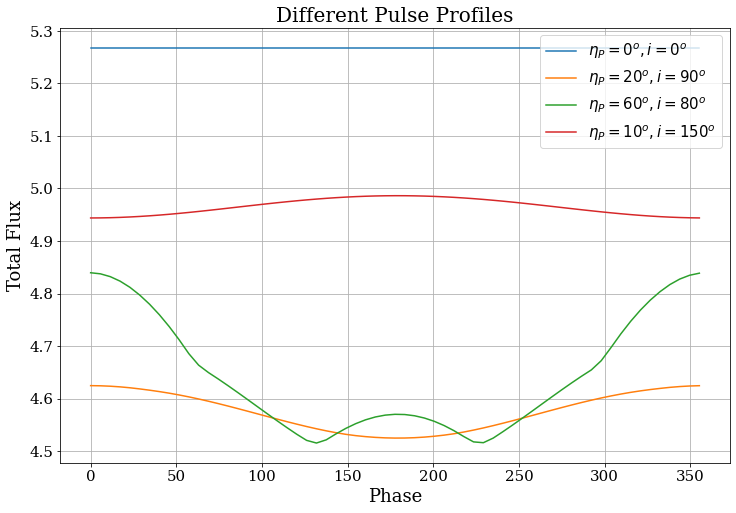

In [124]:
plt.plot(np.rad2deg(phaseRange), fullRotation1, label=r'$\eta_P=0^o, i = 0^o$')
plt.plot(np.rad2deg(phaseRange), fullRotation2, label=r'$\eta_P=20^o, i = 90^o$')
plt.plot(np.rad2deg(phaseRange), fullRotation3, label=r'$\eta_P=60^o, i = 80^o$')
plt.plot(np.rad2deg(phaseRange), fullRotation4, label=r'$\eta_P=10^o, i = 150^o$')
plt.ylabel("Total Flux")
plt.xlabel("Phase")
plt.grid()
plt.legend()
plt.title("Different Pulse Profiles")